In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [28]:
train_dir = './train'
test_dir = './test'

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1697,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=200,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
    )

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 394272)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │    12,616,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,618,194 (48.13 MB)

 Trainable params: 12,618,194 (48.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Ajustar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=7,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/7


ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_4_1/dense_12_1/MatMul/MatMul defined at (most recent call last):
<stack traces unavailable>
OOM when allocating tensor with shape[1697,394272] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_4_1/dense_12_1/MatMul/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_12225]

In [8]:
# Guardar el modelo completo
model.save('models/cuarto_cnn.h5')

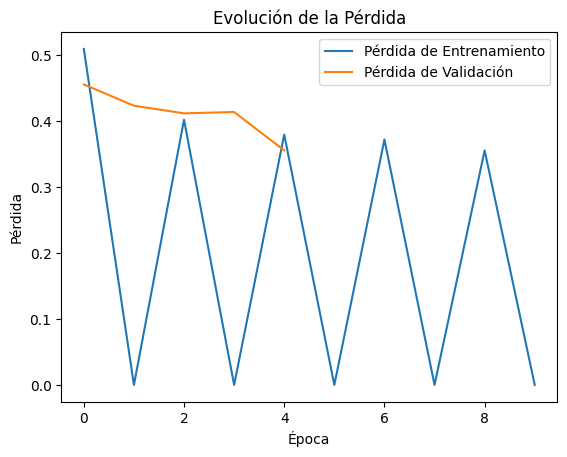

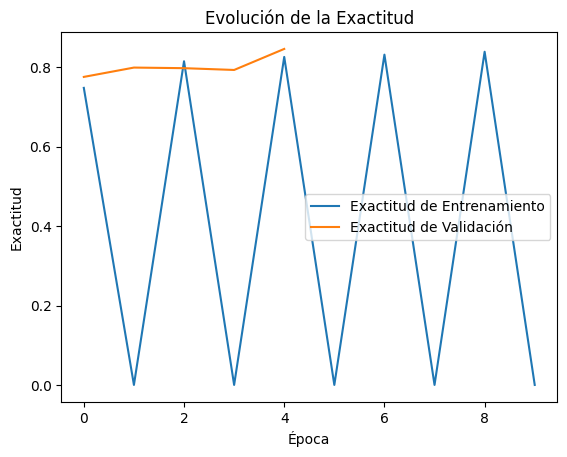

In [9]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [10]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [1]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

NameError: name 'model' is not defined